In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)
len(countries)

651

## Perform API Calls

In [44]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Create lists
lat = []
lon = []
cld = []
date = []
humid = []
max_tmp = []
wind_spd = []
ct = []
cnt = []

# Open log file
f = open('log','w')
f.write('==================================\n')
f.write('  Beginning Data Retrieval\n')
f.write('==================================\n')
count = 0
for city in cities:
    time.sleep(0.5)
    response = requests.get(query_url + city).json()
#     pprint (response)
    if response['cod'] == 200:
        count += 1
        f.write('(' + str(count) + ') ' + city + ' | URL: '+ query_url + city + '\n')
        ct.append(response['name'])
        cnt.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cld.append(response['clouds']['all'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        max_tmp.append(response['main']['temp_max'])
        wind_spd.append(response['wind']['speed'])
f.write('==================================\n')    
f.write('  Data Retrivel Complete\n')
f.write('==================================\n')
f.close()    


## Save data to dataframe

In [53]:
weather_dict = {
    "City": ct,
    "Cloudiness (%)": cld,
    "Country code": cnt,
    "Date": date,
    "Humidity (%)": humid,
    "Latitude": lat,
    "Longitude": lon,
    "Maximum Temperature (F)": max_tmp,
    "Wind Speed (miles/hr)": wind_spd
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness (%),Country code,Date,Humidity (%),Latitude,Longitude,Maximum Temperature (F),Wind Speed (miles/hr)
0,Arraial do Cabo,0,BR,1531722829,94,-22.97,-42.02,69.80,15.59
1,Palmer,20,AU,1531720800,55,-34.85,139.16,60.80,16.11
2,Saskylakh,88,RU,1531722832,63,71.97,114.09,58.01,21.85
3,Pevek,64,RU,1531722833,82,69.70,170.27,44.69,3.62
4,Vaini,92,IN,1531722834,99,15.34,74.49,71.15,11.23


## Save dataframe to csv

In [54]:
weather_data.to_csv('weatherdata.csv')

## Latitude vs Temperature plot

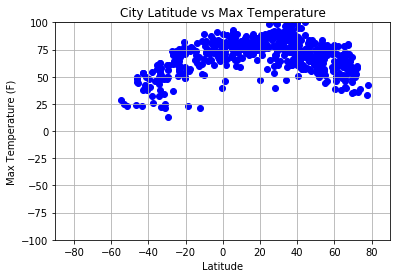

In [55]:
plt.figure()
plt.scatter(weather_data['Latitude'], weather_data['Maximum Temperature (F)'], color='b')
plt.ylim([-100, 100])
plt.xlim([-90, 90])
plt.grid()
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Latitiude_MaxTemperature.png')

### Description on "Latitude vs Temperature Plot"
It shows the largest maximum temperature is at around 20-40 deg N, representing the summertime characterisics. The maximum temperature decreases with increasing degree toward south and north. 

## Latitude vs Humidity plot

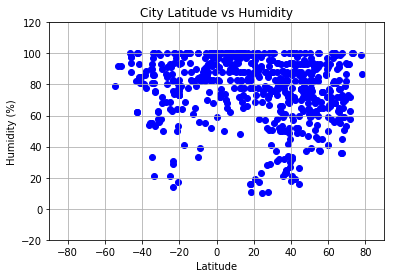

In [56]:
plt.figure()
plt.scatter(weather_data['Latitude'], weather_data['Humidity (%)'], color='b')
plt.ylim([-20, 120])
plt.xlim([-90, 90])
plt.grid()
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Latitiude_Humidity.png')

### Description on "Latitude vs Humidity Plot"
It shows subropical regions (25-40 degS or degN) have the largest range of the humidity. It is consistent with our understanding that some subtropical regions are dry (e.g., desert), while some are wet (e.g., east side continents) during summer time. Tropical regions are always humid than others thus humidity over tropics is often larger than 40-50%. 

## Latitude vs Cloudiness plot

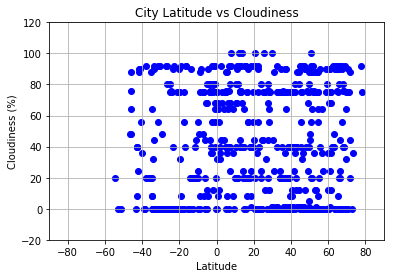

In [57]:
plt.figure()
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness (%)'], color='b')
plt.ylim([-20, 120])
plt.xlim([-90, 90])
plt.grid()
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Latitiude_Cloudiness.png')

### Description on "Latitude vs Cloudiness Plot"
It doesn't show clear laitudinal pattern of cloudiness. It means cloudiness is more related to local weather features than depending on latitude.   

## Latitude vs Wind Speed plot

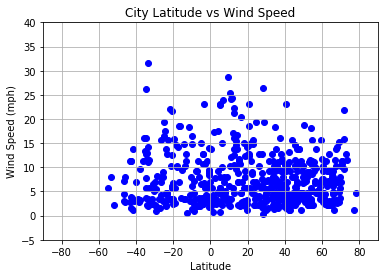

In [58]:
plt.figure()
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed (miles/hr)'], color='b')
plt.ylim([-5, 40])
plt.xlim([-90, 90])
plt.grid()
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Latitiude_WindSpeed.png')

### Description on "Latitude vs Wind Speed Plot"
It doesn't show clear laitudinal pattern of wind speed. However, we can find that most of cities are having wind speed in a range of 0-15 mph but few of them are experiencing strong winds. It might be due to the local weather system or so. 